In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')

from src.Section_2.Module_WalshPSeq import *
from src.Section_2.Part_2A import normalizeWF, initialVals

##### Here an example for XX+YY Long-range interacting Hamiltonians is demonstrated to decouple these interactions using Walsh Pulse sequences. 
##### Plot of Log(|1 - F|) vs Time is plotted for different values of tau (this is the time period after which the pulse sequences are repeated upto Time T) for different values of α.
#### α = 0.5: Trapped Ion Systems, α = 3: Dipolar Systems

In [3]:
params = {
'N' : 1,
'tau_list':[1, 0.5, 0.1, 0.05],
'tau': 0.1,
'n': 2,
'alpha': 3,
'T': 10,
'R': [],
'r': [],
'opH': [X, Y], # Need to change this specific to Model
'pulses': [I, Z] # Need to change this specific to Model
}

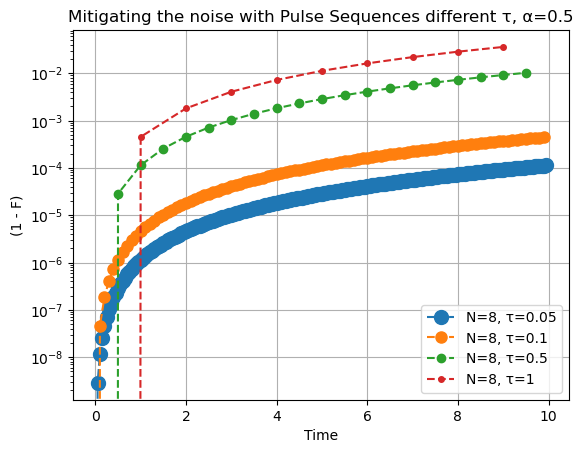

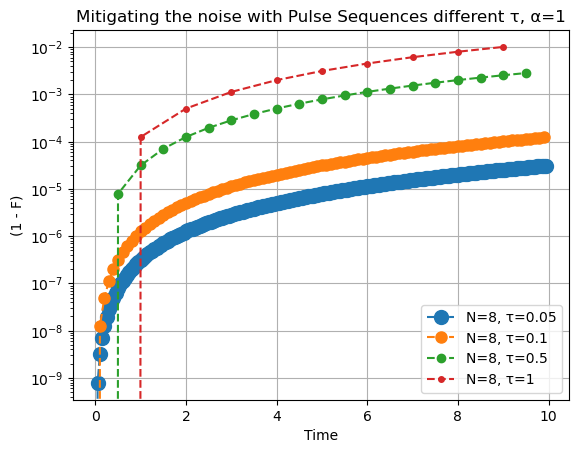

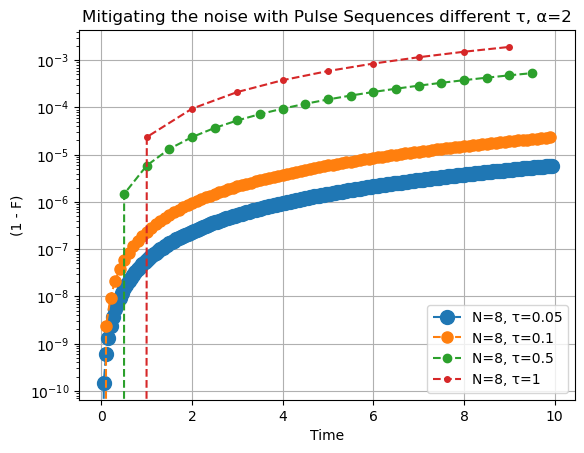

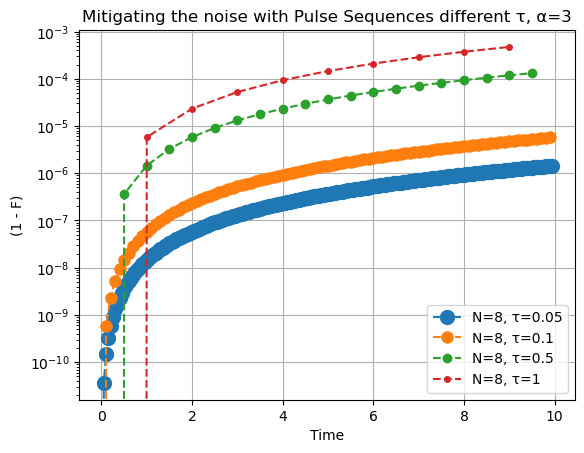

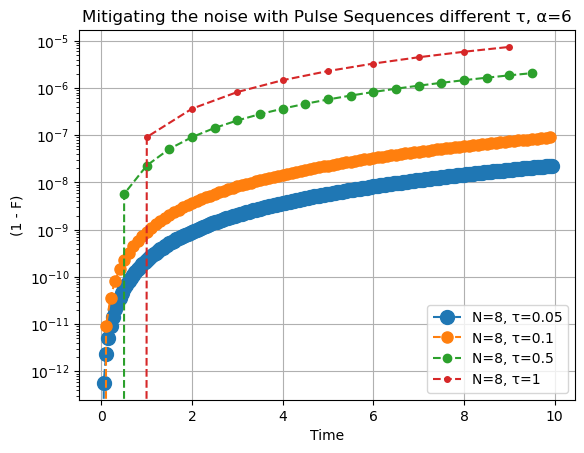

In [4]:
params['alpha_list'] = [0.5, 1, 2, 3, 6]
params['tau_list'] = [0.05, 0.1, 0.5, 1]
params['alpha'] = params['alpha_list'][0]
max_index = 8
Wx, Wy = list(range(0, max_index, 1)), list(range(0, max_index, 1))
# Wx, Wy = [3, 4], [3, 4]
params['N'] = len(Wx)
params['pulses'] = WF_WIList(params, Wx = Wx, Wy = Wy)
Pseq = params['pulses']
params['n'] = len(params['pulses'])
params['opH'] = [X, Y] 
n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
params['R'], params['r'] = R, r

for alpha in params['alpha_list']:
    params['alpha'] = alpha

    cls = 10
    for tau in params['tau_list']:
        psi_t, F, uOp, t = [], [], [], []
        params['tau'] = tau
        uOp, t = WPSeq_TimeEvolOp(params)
        psi_t = [normalizeWF(u@psi_nm) for i,u in enumerate(uOp)]
        F = [1-np.power(np.abs(np.vdot(psi_nm, pt)), 2) for pt in psi_t]
        plt.plot(t, F, "--o", label = f"N={params['N']}, τ={tau}", ms=cls)
        cls -=2
        plt.yscale("log")
        plt.legend()
        plt.xlabel("Time")
        plt.ylabel("(1 - F)")
        plt.title(f"Mitigating the noise with Pulse Sequences different τ, α={params['alpha']}")
        plt.grid('on')
    plt.show()